#**PREDICT ONLINE GAMING BEHAVIOR**

**SUBMITTED BY : DELLA ITTIACHAN**

#**1.OBJECTIVE**

The primary objective of this project is to develop a machine learning model that can accurately predict online gaming behavior, specifically focusing on player engagement levels. By analyzing a rich dataset of player interactions, we aim to identify patterns and trends that can inform game development decisions and enhance the overall player experience.

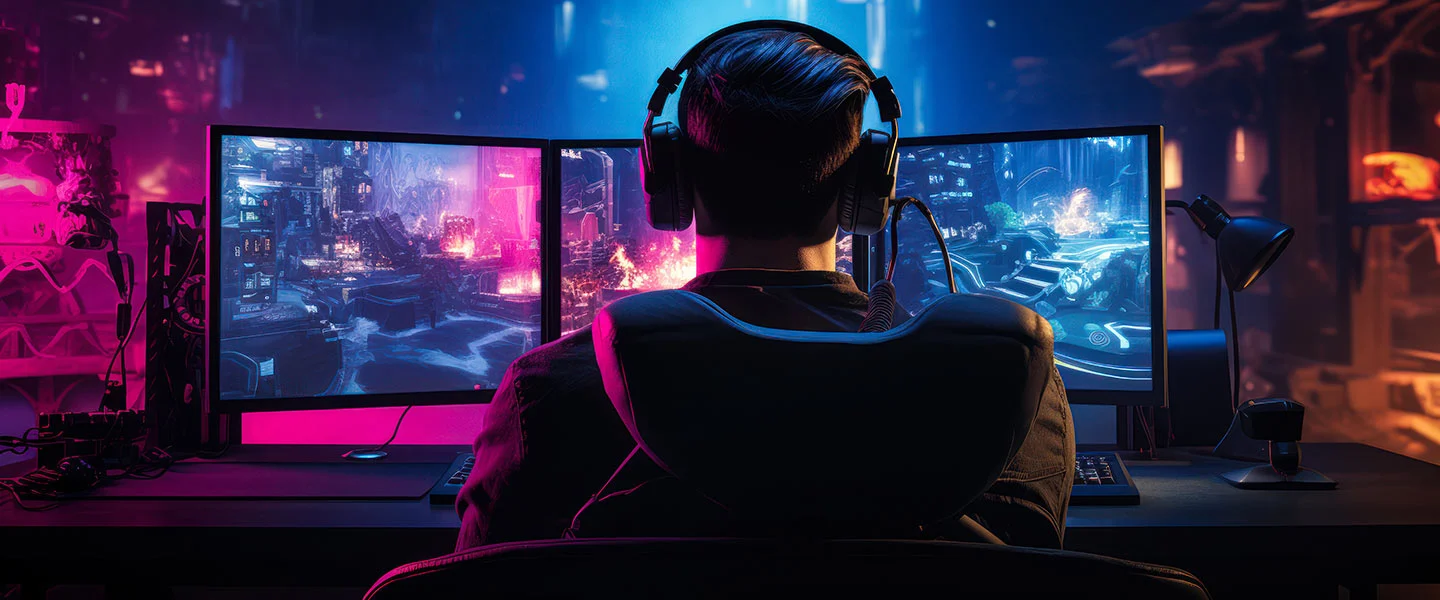

#**2. DATASET DESCRIPTION**

The dataset used in this project is the "online gaming behavior" dataset, which contains various features that capture the interactions and behaviors of players in online gaming environments.

Total rows: 40035, Total columns: 13 (including the target variable).

**Features:**

**PlayerID**: Unique identifier for each player.

**Age**: Age of the player.

**Gender**: Gender of the player.

**Location**: Geographic location of the player.

**GameGenre**: Genre of the game the player is engaged in.

**PlayTimeHours**:   Average hours spent playing per session.

**InGamePurchases**: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).

**GameDifficulty**:   Difficulty level of the game.

**SessionsPerWeek**:   Number of gaming sessions per week.

**AvgSessionDurationMinutes**:  Average duration of each gaming session in minutes.

**PlayerLevel**:  Current level of the player in the game.

**AchievementsUnlocked**:   Number of achievements unlocked by the player.



**Target Variable:**

**EngagementLevel:** Indicates the level of player engagement categorized as 'High', 'Medium', or 'Low'.

**TOOL USED:**
The entire analysis was done using Python and its ML frameworks:

numpy, pandas, matplotlib, seaborn, scikit-learn .

*   **Pandas:** This library is essential for data manipulation and analysis. It provides tools for reading, cleaning, and transforming data into a suitable format for machine learning.
*   **NumPy:** This library is crucial for numerical computations and array operations. It's used for efficient mathematical calculations and matrix operations.

*   **Matplotlib and Seaborn:** These libraries are used for data visualization. They allow us to create various plots and charts to understand data distributions, relationships between variables, and identify trends.
*   **Scikit-learn:** This library provides a wide range of machine learning algorithms, including classification, regression, clustering, and model selection techniques. We used it to implement various models like Logistic Regression, Decision Trees, Random Forest, SVM, and KNN.





#**3. DATA PREPROCESSING**

##**3.1.Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##**3.2.load the dataset**

In [ ]:
data=pd.read_csv('/content/online_gaming_behavior_dataset.csv')

In [ ]:
data

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


#**4.UNDERSTAND THE DATA STRUCTURE**

In [ ]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Give the idea about the datset (no.of rows,non null values,data types).Here 13 colums ,40034 rows and 3 type of datatypes are present (float, int , object).

In [ ]:
data.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
data.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


##**4.1 Handle Missing values**

In [ ]:
data.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


Checking the Missing Values in the dataset.In this dataset there is no missing values

##**4.2.Handle the Duplicates**

In [ ]:
data.duplicated().sum()

0

Checking the Duplicated Values in the Dataset,there is no duplicate values here.

##**4.3 Handle Outliers**

In [ ]:
data.skew(numeric_only=True)

,0
PlayerID,0.000000
Age,-0.004466
PlayTimeHours,-0.002225
InGamePurchases,1.493398
SessionsPerWeek,0.015517
AvgSessionDurationMinutes,-0.005632
PlayerLevel,0.018754
AchievementsUnlocked,-0.005136


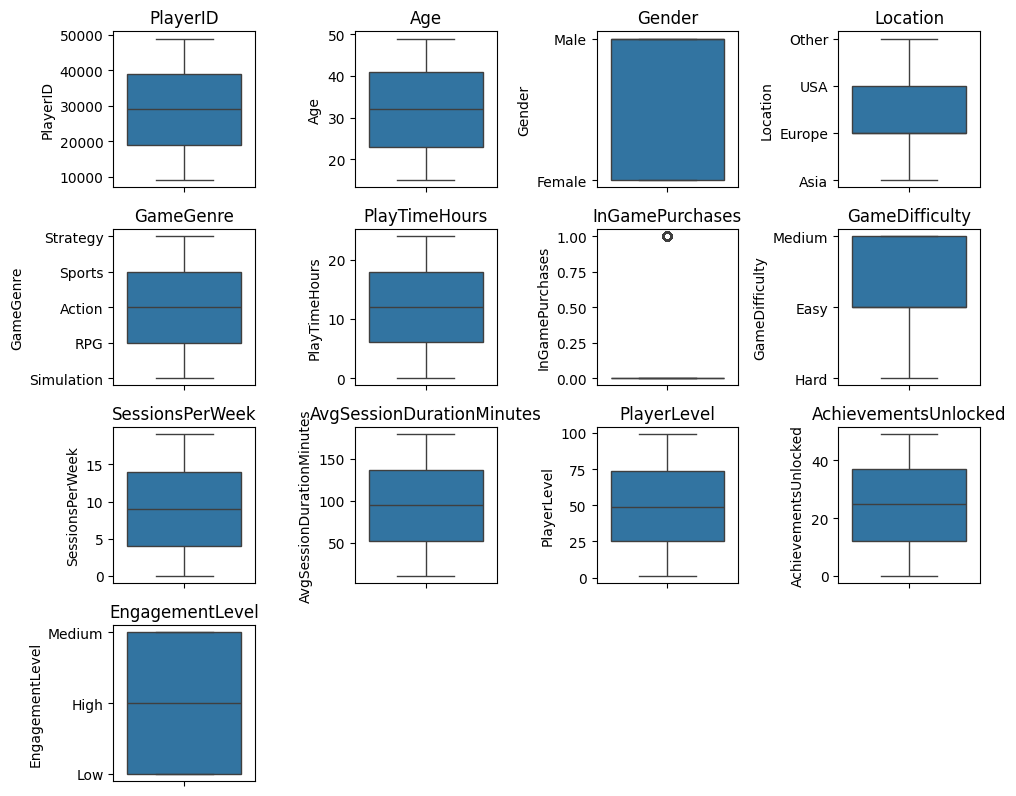

In [ ]:
from logging import makeLogRecord
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, col in enumerate(data):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
q1=data.InGamePurchases.quantile(0.25)
q3=data.InGamePurchases.quantile(0.75)
iqr=q3-q1

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
new_data=data[(data.InGamePurchases>=lower_whisker) & (data.InGamePurchases<=upper_whisker)]
new_data.skew(numeric_only=True)

,0
PlayerID,0.002862
Age,-0.003015
PlayTimeHours,-0.009041
InGamePurchases,0.000000
SessionsPerWeek,0.020495
AvgSessionDurationMinutes,-0.003328
PlayerLevel,0.022589
AchievementsUnlocked,-0.004591


In this data ,skewnes in "InGamePurchases" colume .which is removed by IQR method

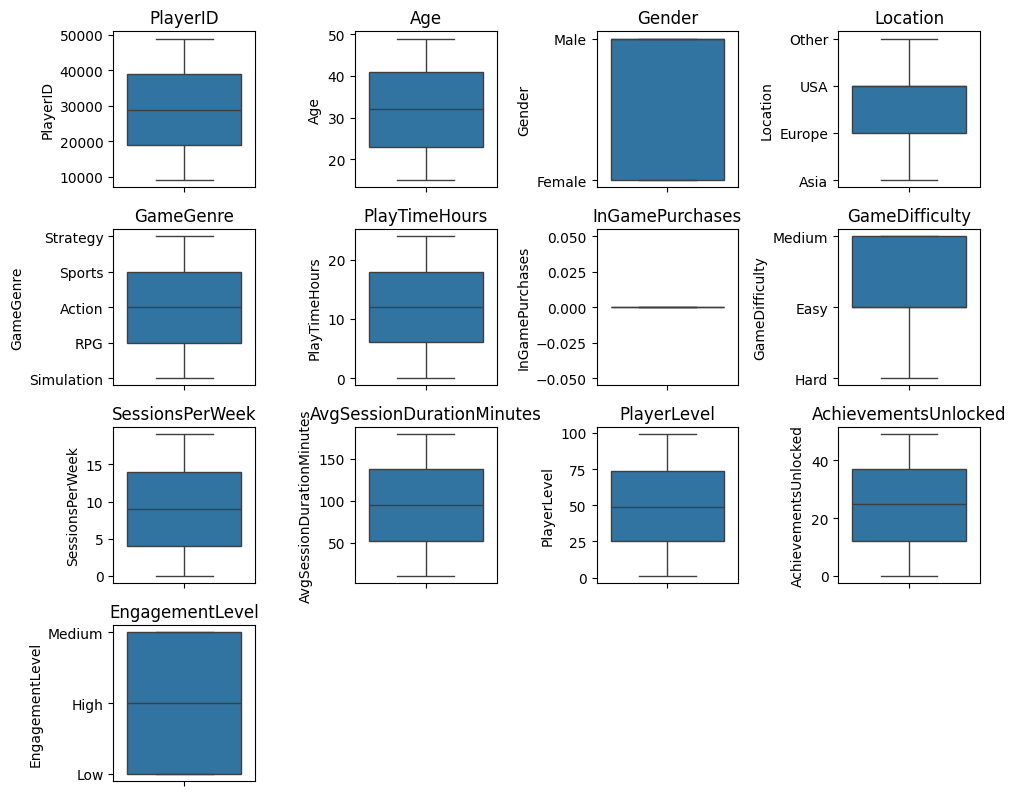

In [ ]:
from logging import makeLogRecord
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, col in enumerate(data):
    plt.subplot(5, 4, i+1)
    sns.boxplot(new_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#**5.DATA** **VISUALIZATION**

Libraries for visualization are: matplotlib and seaborn.

**1.Univariate Analysis**



*  Visualize individual features using histograms



<Figure size 1000x800 with 0 Axes>

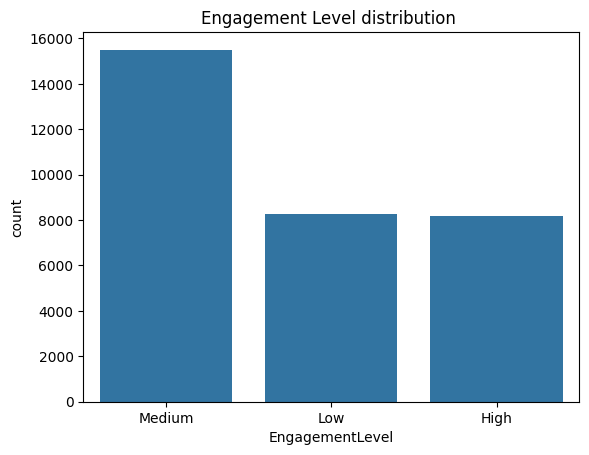

<Figure size 1000x800 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y=new_data.EngagementLevel.value_counts().values
x=new_data.EngagementLevel.value_counts().index
sns.barplot(x=x,y=y)
plt.xlabel('EngagementLevel')
plt.ylabel('count')
plt.title('Engagement Level distribution ')
plt.figure(figsize=(10,8))

1. The majority of players in the dataset exhibit a medium level of engagement. This suggests that a significant portion of the player base is moderately active.
2.The number of players with high and low engagement levels appears to be roughly equal. This indicates that there's a relatively balanced distribution of highly engaged and less engaged players.

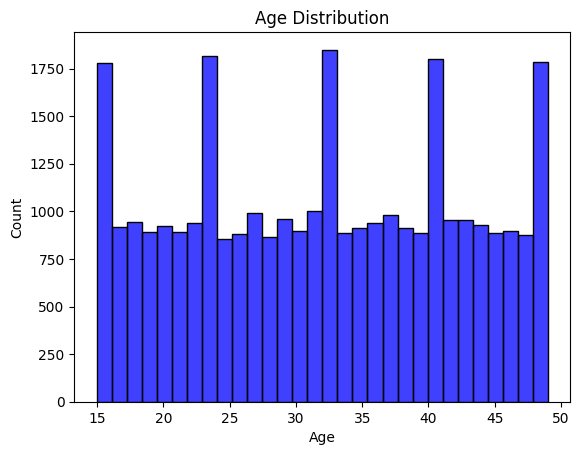

In [ ]:
sns.histplot(new_data['Age'], color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


As you can see in the table above,the majority of players are between the ages of 15 and 50.
But people who are around 49 years old and 15 years old students are still playing games.
game attracts players from a wide range of age groups, not just the younger demographic.

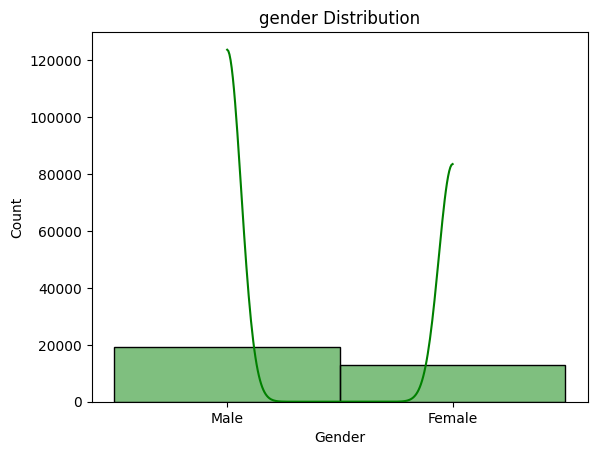

In [ ]:
sns.histplot(new_data['Gender'], kde=True, color='green')
plt.title('gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

1.The chart clearly shows that a significantly larger proportion of players are male compared to female. This indicates a gender imbalance in the player base.

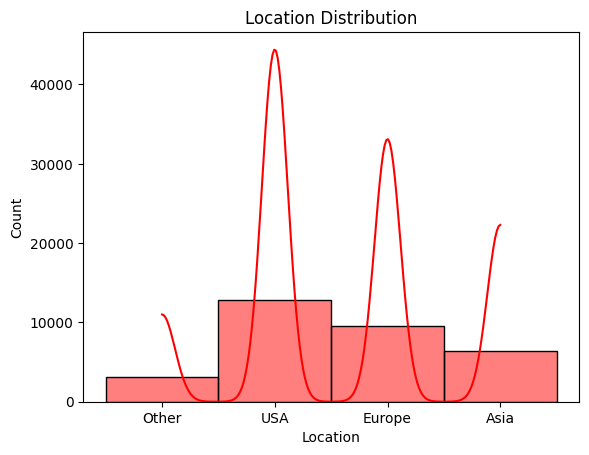

In [ ]:
sns.histplot(new_data['Location'], kde=True, color='red')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()



1. Dominance of USA and Europe:
The chart reveals that the majority of players are located in the USA and Europe. These regions appear to be the primary markets for the game.
2. Significant Presence in Asia:
Asia is the third largest region in terms of player base. This indicates a substantial presence of players from Asian countries.

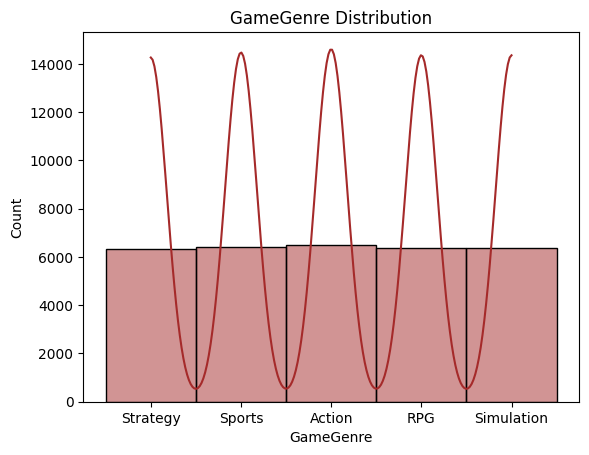

In [ ]:
sns.histplot(new_data['GameGenre'], kde=True, color='BROWN')
plt.title('GameGenre Distribution')
plt.xlabel('GameGenre')
plt.ylabel('Count')
plt.show()

The chart indicates a relatively even distribution of players across the five game genres: Strategy, Sports, Action, RPG, and Simulation

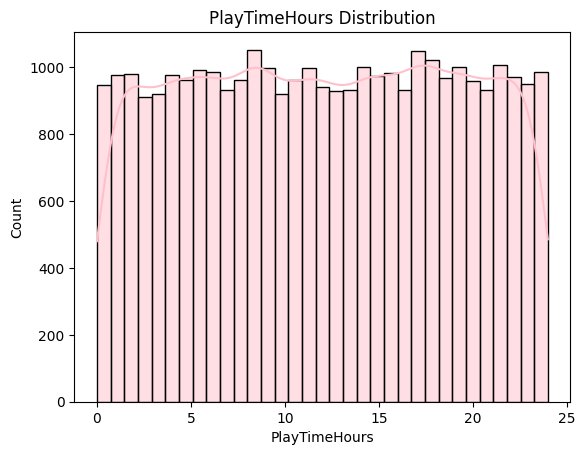

In [ ]:
sns.histplot(new_data['PlayTimeHours'], kde=True, color='PINK')
plt.title('PlayTimeHours Distribution')
plt.xlabel('PlayTimeHours')
plt.ylabel('Count')
plt.show()

1. Even Distribution:
The chart shows a relatively even distribution of playtime hours across the range of 0 to 25 hours. This indicates that players exhibit a wide range of playtimes, with no significant peaks or troughs.
2. Moderate Playtime:
The majority of players seem to have moderate playtime, with the peak frequency occurring around 5-10 hours. This suggests that the game is designed to accommodate both casual and dedicated players.

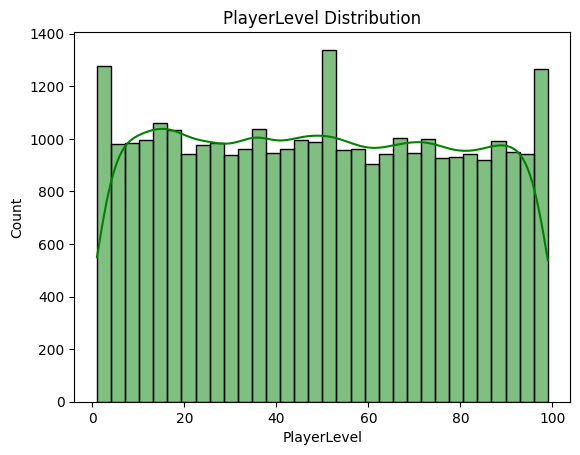

In [ ]:
sns.histplot(new_data['PlayerLevel'], kde=True, color='green')
plt.title('PlayerLevel Distribution')
plt.xlabel('PlayerLevel')
plt.ylabel('Count')
plt.show()

1. Wide Range of Player Levels:
The histogram shows a wide distribution of player levels, ranging from 0 to 100. This indicates that the game has a diverse player base, with players at different stages of progression.
2. To encourage player progression, consider implementing level-based rewards and challenges.
This can motivate players to reach higher levels and stay engaged with the game.



**2. Bivariate Analysis**

*   Visualize the relationship between two variables using scatter plots or bar plots (sns.scatterplot())




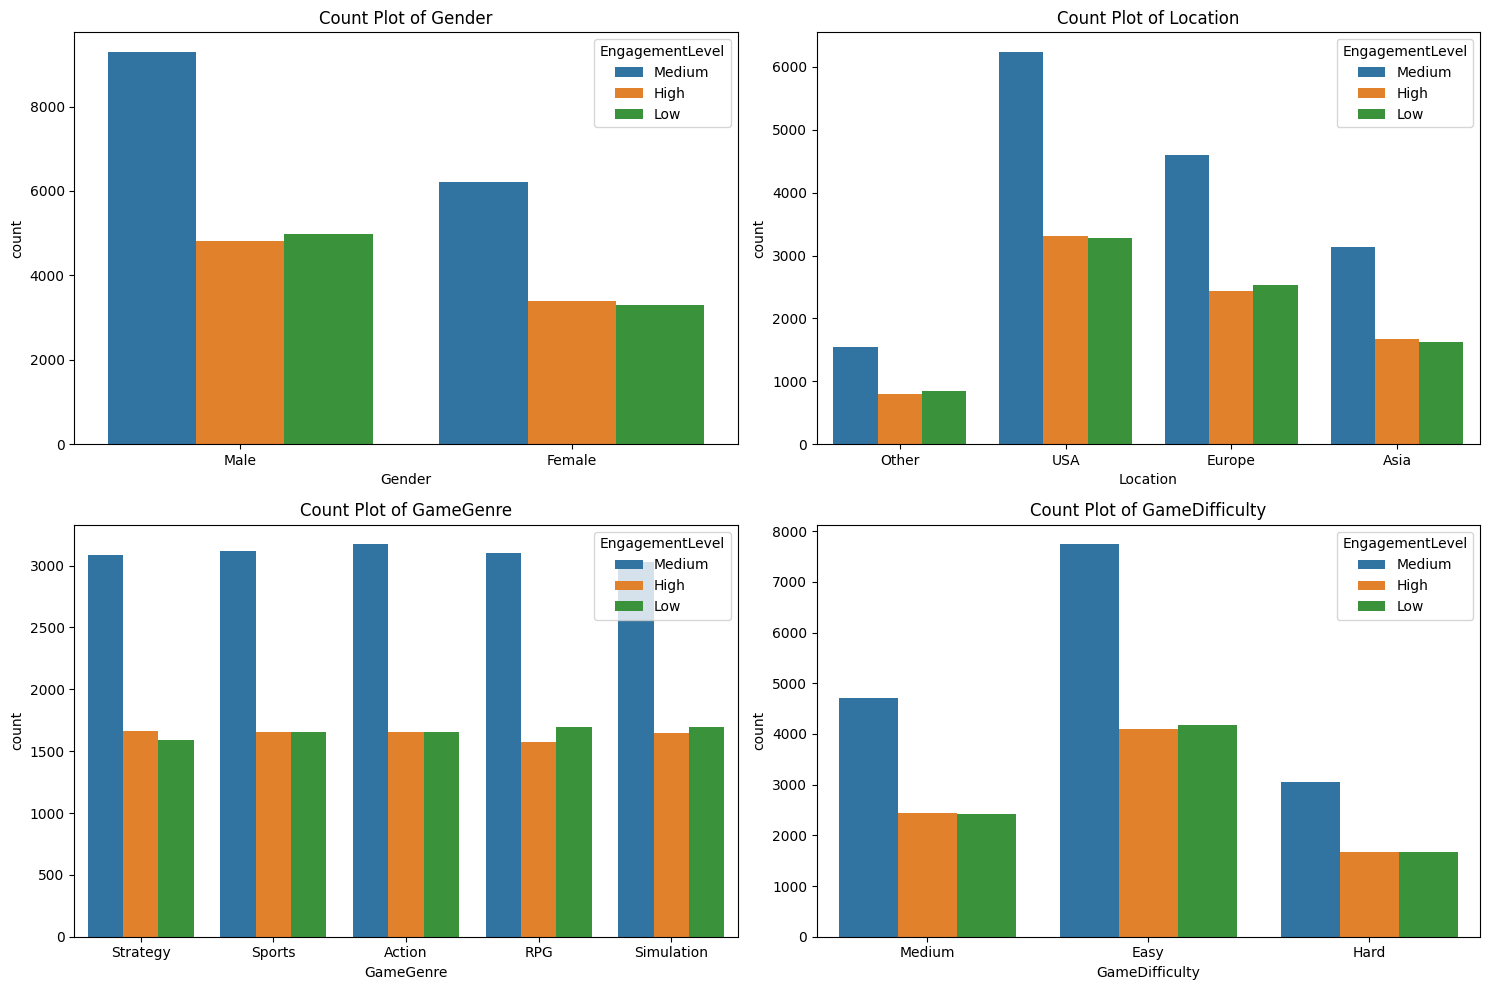

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Plot count plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features,1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=new_data, hue='EngagementLevel')
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


1. Gender and Engagement:
Male Dominance: The majority of players are male.
Engagement Levels: While males dominate the player base, the distribution of engagement levels (high, medium, low) seems relatively similar across genders. This suggests that gender alone might not be a strong predictor of engagement.
2. Location and Engagement:
Regional Differences: Players from the USA and Europe appear to be more engaged, with a higher proportion of high-engagement players.
Other Regions: Players from other regions, including Asia, show a more balanced distribution of engagement levels.
3. Game Genre and Engagement:
Genre Preferences: Players seem to be evenly distributed across different game genres.
Engagement Variation: While there are slight variations in engagement levels across genres, the overall trend is similar.
4. Game Difficulty and Engagement:
Difficulty Preference: A majority of players prefer medium difficulty.
Engagement and Difficulty: There seems to be a slight correlation between difficulty level and engagement. More players are highly engaged in medium difficulty games.

**Comparing Each Genre by Country**

Location    Asia  Europe  Other   USA
GameGenre                            
Action      1656    2428    792  3163
RPG         1620    2372    787  3173
Simulation  1623    2414    795  3151
Sports      1582    2431    775  3260
Strategy    1614    2359    786  3253


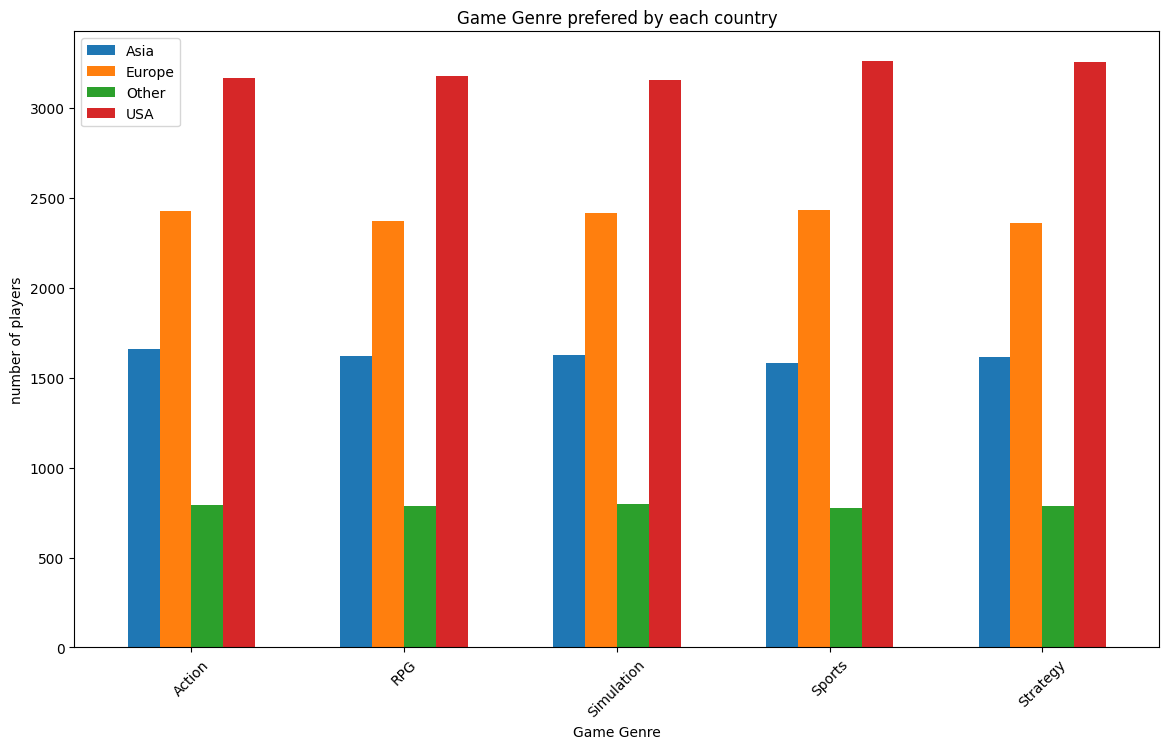

In [ ]:
data['Location'].unique()

genre_country_count = data.groupby(['GameGenre', 'Location']).size().unstack()
country_list = data['Location'].unique().tolist()
sorted_country_list = sorted(country_list)

legend_labels = {country: country for country in sorted_country_list}

print(genre_country_count)

genre_country_count.plot(kind='bar', figsize=(14,8), width=0.6)
plt.title('Game Genre prefered by each country')
plt.xlabel('Game Genre')
plt.ylabel('number of players')
plt.xticks(rotation=45)
plt.legend(legend_labels.values())
plt.show()

In [ ]:
total_players_count = data.shape[0]

genre_country_percentage = genre_country_count.apply(lambda x: (x / total_players_count) * 100, axis=1)
print(genre_country_percentage)

Location        Asia    Europe     Other       USA
GameGenre                                         
Action      4.136484  6.064845  1.978318  7.900784
RPG         4.046560  5.924964  1.965829  7.925763
Simulation  4.054054  6.029875  1.985812  7.870810
Sports      3.951641  6.072339  1.935855  8.143078
Strategy    4.031573  5.892491  1.963331  8.125593


The data above showed me that USA is the most popular country in video games. Having more players in every genre of the game. The second highest is Europe followed by Asia.

As for the data, the highest number of player in the USA is sports. In Europe, the highest is still sports. In Asia, highest population of players playing the action genre. Lastly, the highest players plays simulation games.

**Comparing Each Genre for each Gender**

Gender      Female  Male
GameGenre               
Action        2544  3942
RPG           2627  3749
Simulation    2582  3791
Sports        2579  3847
Strategy      2563  3769


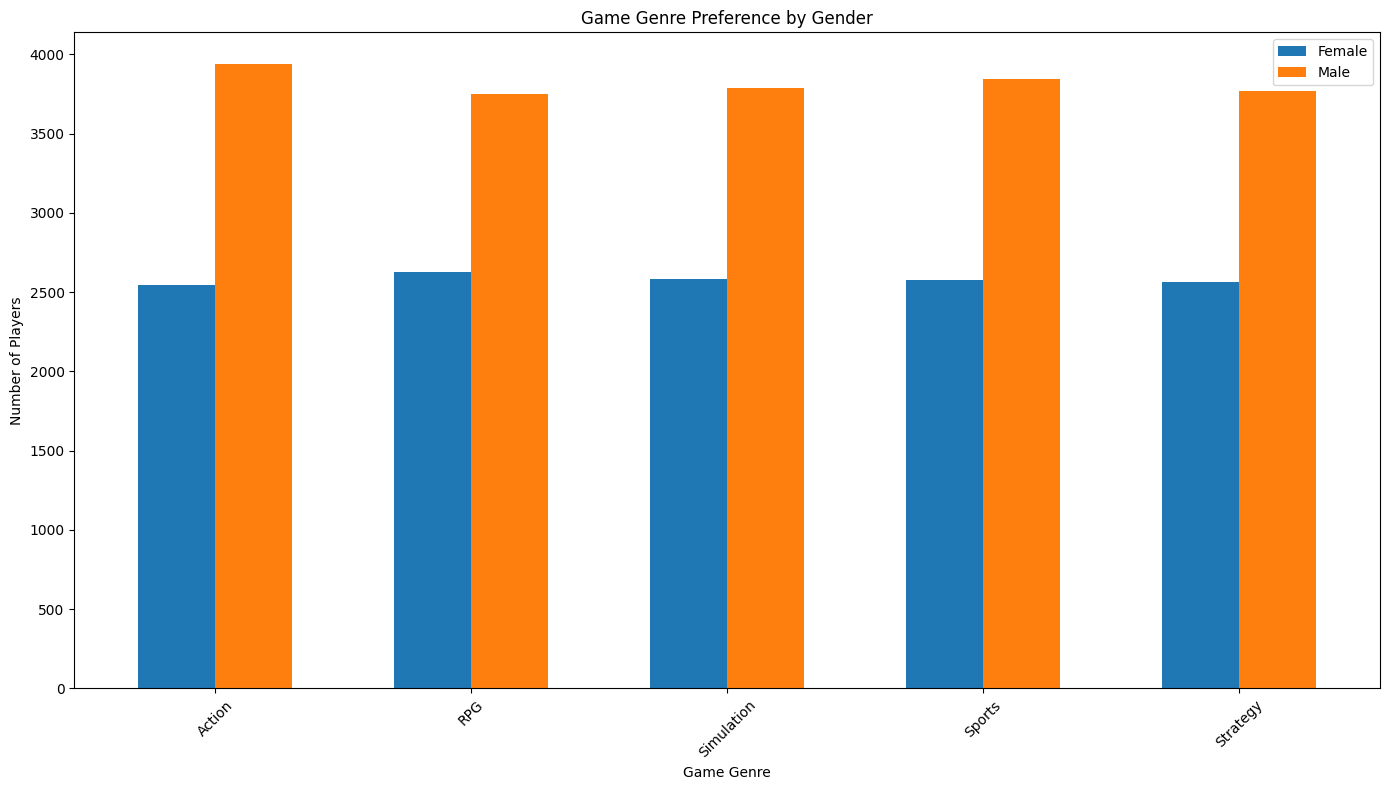

In [ ]:
#Grouping the Gender and Genre together
genre_gender_count = new_data.groupby(['GameGenre', 'Gender']).size().unstack()

gender_list = new_data['Gender'].unique().tolist()
sorted_gender_list = sorted(gender_list)
legend_labels = {gender: gender for gender in sorted_gender_list}

print(genre_gender_count)
#Plotting the data into a bar Graph
ax = genre_gender_count.plot(kind='bar', figsize=(14,8), width=0.6)
plt.title('Game Genre Preference by Gender')
plt.xlabel('Game Genre')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(legend_labels.values())
plt.tight_layout()
plt.show()

The most popular genre for the male players is Action while the most popular genre for the female players is RPG. I also see that for every genre in each gender, all of them are not far from each other. Although male players have more players than female players.

**3.Multivariate Analysis**

Use pair plots, heatmaps for correlation

**Correlation Matrix**

In [ ]:
num_features = new_data.select_dtypes(include=['number']).columns
num_features

Index(['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases',
       'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
       'AchievementsUnlocked'],
      dtype='object')

In [ ]:
x = new_data.drop('EngagementLevel', axis=1)
y = new_data['EngagementLevel']


In [ ]:
num_features = new_data[num_features.tolist()]
corr = num_features.corr()
corr

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
PlayerID,1.000000,-0.005149,0.004231,NaN,-0.007767,-0.000432,-0.002764,0.002990
Age,-0.005149,1.000000,-0.000385,NaN,0.004027,-0.001730,-0.000226,-0.002365
PlayTimeHours,0.004231,-0.000385,1.000000,NaN,-0.003190,-0.003161,-0.006912,0.004275
InGamePurchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SessionsPerWeek,-0.007767,0.004027,-0.003190,NaN,1.000000,-0.002442,0.006797,-0.000553
AvgSessionDurationMinutes,-0.000432,-0.001730,-0.003161,NaN,-0.002442,1.000000,0.001473,-0.001126
PlayerLevel,-0.002764,-0.000226,-0.006912,NaN,0.006797,0.001473,1.000000,0.006064
AchievementsUnlocked,0.002990,-0.002365,0.004275,NaN,-0.000553,-0.001126,0.006064,1.000000


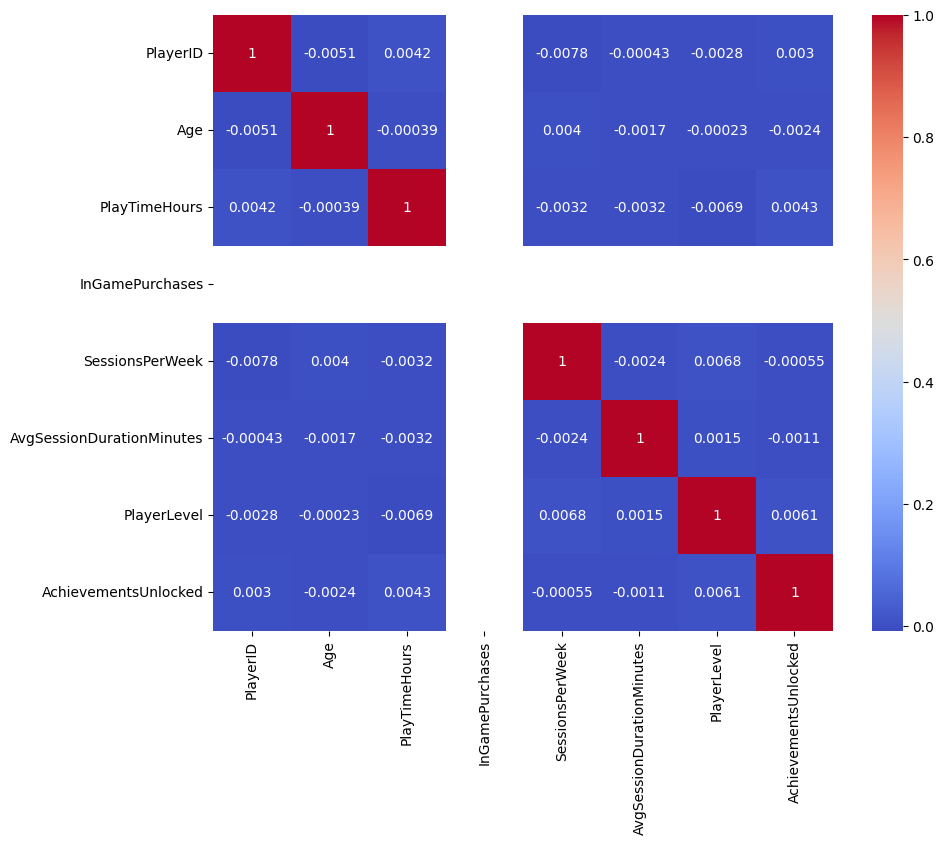

In [ ]:
# Calculate the correlation matrix
corr = num_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

1. Weak Correlations:
The correlation matrix reveals that there are no strong correlations between the numerical features. Most of the correlations are very weak, indicating that the variables are not highly related to each other.
2. Potential for Non-Linear Relationships:
While linear correlations are weak, it's possible that there might be non-linear relationships between variables.


#**6.FEATURE ENGINEERING**

In [ ]:
# Remove unnecessary columns
columns_to_drop = ['PlayerID']
new_data= new_data.drop(columns='PlayerID',axis=1)

print(new_data.head())

   Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0   43    Male    Other  Strategy      16.271119                0   
1   29  Female      USA  Strategy       5.525961                0   
2   22  Female      USA    Sports       8.223755                0   
4   33    Male   Europe    Action      15.531945                0   
5   37    Male   Europe       RPG      20.561855                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
4         Medium                2                        131           95   
5           Easy                2                         81           74   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Mediu

In [ ]:
new_data.shape

(31993, 12)

**DATA TRANNSFORM**

In [ ]:
new_data

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
40027,17,Male,Europe,Simulation,1.273467,0,Easy,6,24,52,17,Low
40028,36,Male,USA,RPG,1.020489,0,Hard,4,34,97,21,Low
40029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High


#**7.ENCODING CATEGORICAL COLUMNS**

**Onehot encode the feature columns**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = x.select_dtypes(include='object').columns

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(x[categorical_cols])



In [ ]:
print("Encoded features shape:", encoded_features.shape)
print("Feature names:", encoder.get_feature_names_out())

Encoded features shape: (31993, 14)
Feature names: ['Gender_Female' 'Gender_Male' 'Location_Asia' 'Location_Europe'
 'Location_Other' 'Location_USA' 'GameGenre_Action' 'GameGenre_RPG'
 'GameGenre_Simulation' 'GameGenre_Sports' 'GameGenre_Strategy'
 'GameDifficulty_Easy' 'GameDifficulty_Hard' 'GameDifficulty_Medium']


In [ ]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [ ]:
encoded_df

,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31988,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
31989,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31990,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
31991,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Reset index to ensure alignment before concatenation
new_data = new_data.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
# Concatenate along the columns (axis=1), ensuring `categorical_cols` are dropped first
new_data = pd.concat([new_data.drop(columns=categorical_cols), encoded_df], axis=1)
# Verify the final column count and check for any unexpected NaNs
print("Final column count:", new_data.shape[1])
print("Any NaNs:", new_data.isna().sum().sum())

Final column count: 22
Any NaNs: 0


In [ ]:
print("Shape of x without categorical columns:", x.drop(categorical_cols, axis=1).shape)
print("Shape of encoded_df:", encoded_df.shape)

Shape of x without categorical columns: (31993, 8)
Shape of encoded_df: (31993, 14)


**Label encode the output colum**

Label encodes the target variable EngagementLevel

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[2 2 0 ... 2 0 2]


In [ ]:
new_data['EngagementLevel'] = y

In [ ]:
new_data

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,2,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,29,5.525961,0,5,144,11,10,2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,22,8.223755,0,16,142,35,41,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,33,15.531945,0,2,131,95,37,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37,20.561855,0,2,81,74,22,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31988,17,1.273467,0,6,24,52,17,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
31989,36,1.020489,0,4,34,97,21,1,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31990,32,20.619662,0,4,75,85,14,2,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
31991,44,13.539280,0,19,114,71,27,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#**8.FEATURE IMPORTANCE:**

Trains a Random Forest Classifier model to identify the most important features for predicting engagement.
Uses feature importances and a bar chart to visualize the relative importance of each feature.

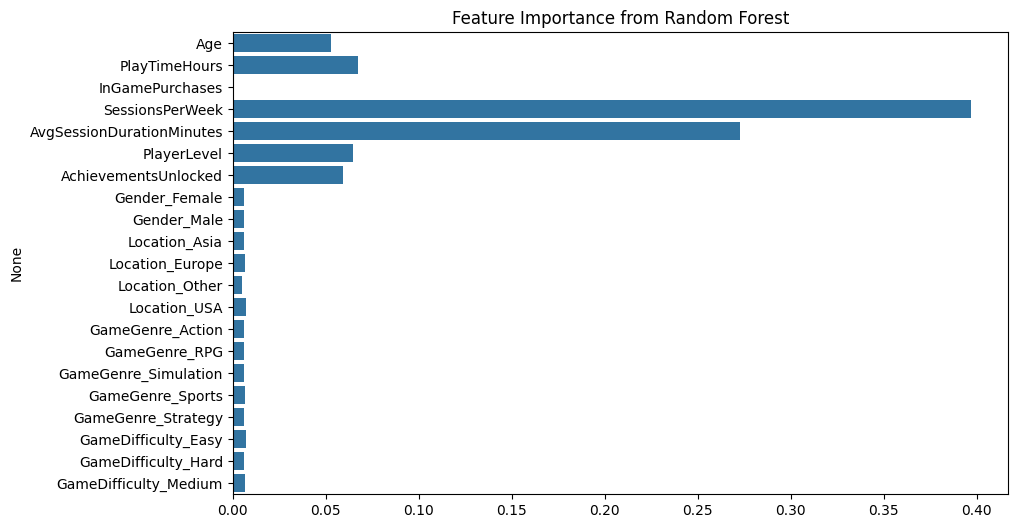

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data (similar to the preprocessing steps)
x = new_data.drop(columns=['EngagementLevel'])
y = new_data['EngagementLevel']

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(x, y)

# Feature importance
importances = model.feature_importances_
features = x.columns

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()


**Most Important Features:**

**AvgSessionDurationMinutes:** This suggests that the average duration of gaming sessions is a crucial factor in predicting player engagement and behavior. Longer sessions often indicate higher levels of interest and investment in the game.

**SessionsPerWeek:** The frequency of gaming sessions is another significant factor. Consistent engagement over time can be a strong indicator of player loyalty and potential for future activity.

**PlayerLevel:**This feature highlights the importance of player progression and achievement. Higher-level players may exhibit different behaviors and preferences compared to lower-level players.

In [ ]:
importances

array([0.0527754 , 0.06748327, 0.        , 0.39677694, 0.27254864,
       0.06474491, 0.05926939, 0.0059003 , 0.00592921, 0.0060907 ,
       0.00675126, 0.00494944, 0.00716567, 0.00607196, 0.00593693,
       0.00579549, 0.00643266, 0.00605146, 0.00693413, 0.00587948,
       0.00651276])

**Balancing Techniques using imblearn**

In [ ]:
new_data['EngagementLevel'].unique()

array([2, 0, 1])

In [ ]:
new_data['EngagementLevel'].value_counts()

,count
EngagementLevel,
2,15504
1,8287
0,8202


In [ ]:
_# Step 1: Separate the features (X) and target (y)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x = new_data.drop(columns=['EngagementLevel'])
y = new_data['EngagementLevel']

# Apply SMOTE first to balance the classes, you can change this line in accordance
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Step 4: Convert the resampled data back to a DataFrame if needed
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['EngagementLevel'])

# Step 5: Optionally, combine the resampled features and target back into a single DataFrame
df_resampled = pd.concat([x_resampled_df, y_resampled_df], axis=1)

# Step 6: Check the new class distribution to ensure balance
print(df_resampled['EngagementLevel'].value_counts())

EngagementLevel
2    15504
0    15504
1    15504
Name: count, dtype: int64


In [ ]:
df_resampled

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,Location_Asia,...,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel
0,43,16.271119,0,6,108,79,25,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,1.000000,0.000000,0.00000,1.000000,2
1,29,5.525961,0,5,144,11,10,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.00000,1.000000,0.000000,0.00000,1.000000,2
2,22,8.223755,0,16,142,35,41,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,1.00000,0.000000,1.000000,0.00000,0.000000,0
3,33,15.531945,0,2,131,95,37,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,2
4,37,20.561855,0,2,81,74,22,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46507,17,10.938101,0,9,33,59,3,0.000000,1.000000,0.449727,...,0.550273,0.550273,0.0,0.000000,0.00000,0.449727,1.000000,0.00000,0.000000,1
46508,45,0.981057,0,5,13,6,33,0.000000,1.000000,0.000000,...,1.000000,0.721508,0.0,0.278492,0.00000,0.000000,0.721508,0.00000,0.278492,1
46509,43,7.525662,0,4,17,22,3,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.00000,0.000000,0.000000,0.00000,1.000000,1
46510,23,15.233107,0,0,174,41,15,0.884070,0.115930,0.884070,...,0.000000,0.000000,0.0,0.000000,0.88407,0.115930,0.000000,0.11593,0.884070,1


In [ ]:
_# Step 1: Separate the features (X) and target (y)
from sklearn.model_selection import train_test_split

X = df_resampled.drop(columns=['EngagementLevel'])
y = df_resampled['EngagementLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37209, 21) (9303, 21) (37209,) (9303,)


#**9.STANDARDIZING**

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# Step 4: Fit and transform the training data
X_train_scaled= std.fit_transform(X_train)

# Step 5: Transform the testing data
X_test_scaled= std.fit_transform(X_test)

#**10.MODEL SELECTION**

*   Logistic Regression
*   Decision Trees
*   Random Forest
*   Support Vector Machines (SVM)
*   k-Nearest Neighbors (k-NN)





##**10.1.Logistic Regression**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

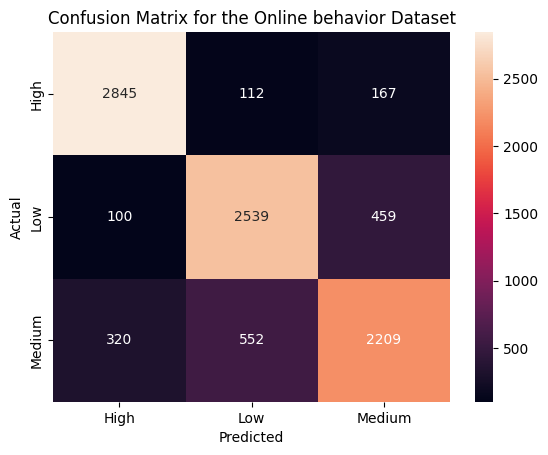

In [ ]:
con=confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con, annot=True,fmt='d',  xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Online behavior Dataset')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2845  112  167]
 [ 100 2539  459]
 [ 320  552 2209]]


In [ ]:
# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3124
           1       0.79      0.82      0.81      3098
           2       0.78      0.72      0.75      3081

    accuracy                           0.82      9303
   macro avg       0.81      0.82      0.81      9303
weighted avg       0.81      0.82      0.81      9303



In [ ]:
y_pred #predicted

array([1, 1, 1, ..., 2, 1, 2])

In [ ]:
y_test#actual

,EngagementLevel
41276,1
28355,1
41057,1
5266,0
37594,0
...,...
26271,1
40394,1
13082,0
39557,1


In [ ]:
# Accuracy score
log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

0.8161883263463399


##**10.2.SVM (SUPPORT VECTOR MACHINE)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 2, 1, 2])

In [ ]:
y_test


,EngagementLevel
41276,1
28355,1
41057,1
5266,0
37594,0
...,...
26271,1
40394,1
13082,0
39557,1


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2805  110  209]
 [  97 2781  220]
 [  97  180 2804]]


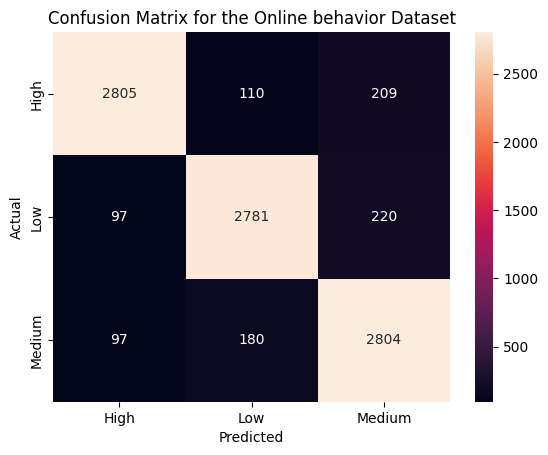

In [ ]:
con=confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con, annot=True,fmt='d',  xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Online behavior Dataset')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3124
           1       0.91      0.90      0.90      3098
           2       0.87      0.91      0.89      3081

    accuracy                           0.90      9303
   macro avg       0.90      0.90      0.90      9303
weighted avg       0.90      0.90      0.90      9303



In [ ]:
svm_accuracy=accuracy_score(y_test, y_pred)
print(svm_accuracy)

0.9018596151778996


##**10.3.DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test_scaled)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 2, 2, ..., 2, 2, 2])

In [ ]:
y_test

,EngagementLevel
41276,1
28355,1
41057,1
5266,0
37594,0
...,...
26271,1
40394,1
13082,0
39557,1


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 803  397 1924]
 [ 832  257 2009]
 [ 885   91 2105]]


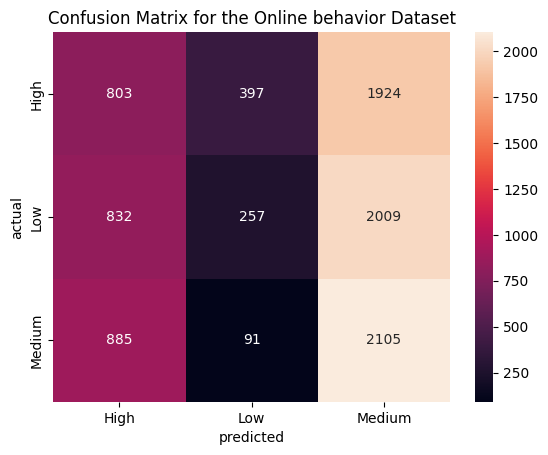

In [ ]:
con=confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con,annot=True,fmt='d',xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title('Confusion Matrix for the Online behavior Dataset')
plt.show()

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.32      0.26      0.28      3124
           1       0.34      0.08      0.13      3098
           2       0.35      0.68      0.46      3081

    accuracy                           0.34      9303
   macro avg       0.34      0.34      0.29      9303
weighted avg       0.34      0.34      0.29      9303



In [ ]:
dt_accuracy=accuracy_score(y_test,y_pred)
print(dt_accuracy)

0.3402128345694937


##**10.4.RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 2, 1, 0])

In [ ]:
y_test

,EngagementLevel
41276,1
28355,1
41057,1
5266,0
37594,0
...,...
26271,1
40394,1
13082,0
39557,1


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2923  165   36]
 [ 125 2944   29]
 [ 798 1402  881]]


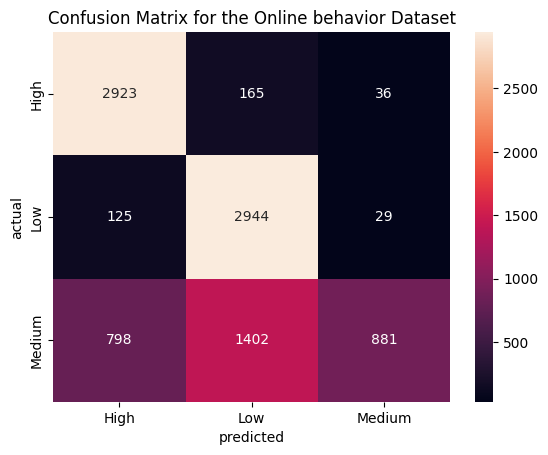

In [ ]:
con=confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con,annot=True,fmt='d',xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title('Confusion Matrix for the Online behavior Dataset')
plt.show()

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      3124
           1       0.65      0.95      0.77      3098
           2       0.93      0.29      0.44      3081

    accuracy                           0.73      9303
   macro avg       0.78      0.72      0.68      9303
weighted avg       0.78      0.73      0.68      9303



In [ ]:
rand_clf_accuracy=accuracy_score(y_test,y_pred)
print(rand_clf_accuracy)
#

0.7253574115876599


##**10.5.k-Nearest Neighbors (k-NN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 0, 1, 2])

In [ ]:
y_test

,EngagementLevel
41276,1
28355,1
41057,1
5266,0
37594,0
...,...
26271,1
40394,1
13082,0
39557,1


In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[2634,   96,  394],
       [ 138, 2347,  613],
       [ 425,  500, 2156]])

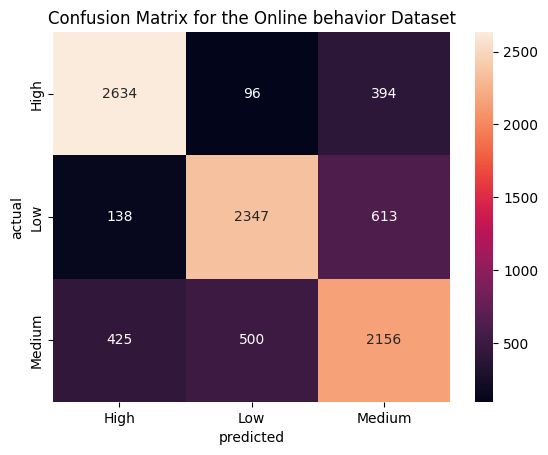

In [ ]:
con=confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con,annot=True,fmt='d',xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title('Confusion Matrix for the Online behavior Dataset')
plt.show()

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3124
           1       0.80      0.76      0.78      3098
           2       0.68      0.70      0.69      3081

    accuracy                           0.77      9303
   macro avg       0.77      0.77      0.77      9303
weighted avg       0.77      0.77      0.77      9303



In [ ]:
knn_clf_accuracy=accuracy_score(y_test,y_pred)
print(knn_clf_accuracy)

0.7671718800386972


**Model Comparison**

In [ ]:
dict={'model':['Lgdtic Reggression','Decision Tree Classfier','Random Forest Classifier','Support Vector Machine','k-Nearest Neighbors'],'Score':[log_accuracy,dt_accuracy,rand_clf_accuracy,svm_accuracy,knn_clf_accuracy]}

In [ ]:
df_model=pd.DataFrame(dict)
df_model.sort_values(by='Score',ascending=False)

,model,Score
3,Support Vector Machine,0.901860
0,Lgdtic Reggression,0.816188
4,k-Nearest Neighbors,0.767172
2,Random Forest Classifier,0.725357
1,Decision Tree Classfier,0.340213


After analyzing accuracy score ,the best model for predict online gaming behavior is SUPPORT VECTOR MACHINE	with an accuracy of 90.1%.This data set perfectly suitable.


In [ ]:
# Step 6: Predict and Calculate Accuracy Scores
log_reg_pred = log_reg.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

In [ ]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print Accuracy Scores
print(f"Logistic Regression testing Accuracy: {log_reg_accuracy:.2f}")
print(f"SVM testing Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest testing Accuracy: {rf_accuracy:.2f}")

Logistic Regression testing Accuracy: 0.82
SVM testing Accuracy: 0.90
Random Forest testing Accuracy: 0.73


Testing accuracy is also high in support vector machine.

In [ ]:
import pickle

# Assuming rf is your trained classifier and you have fitted it
# svm.fit(X_train_scaled, y_train)

# Save the fitted model to a file
file= open('ML Project-online gaming behavior', 'wb')
pickle.dump(rf, file)

print("Classifier saved successfully.")

Classifier saved successfully.


#**11.HYPER PARAMETER TUNING**

Hyperparameter tuning is to improve the model's performance: Better settings can lead to more accurate predictions.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Hyperparameter tuning using GridSearchCV

# Logistic Regression
log_reg = LogisticRegression(max_iter=100)
log_reg_params = {'C': [0.01, 0.1, 1]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train_scaled, y_train)

# SVM
svm = SVC()
svm_params = {'C': [0.1,1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [10,50, 100], 'max_depth': [2,3, 5, 7]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Step 6: Evaluate model performance
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# best parameter of random forest
rf_grid.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [ ]:
# best parameter of logistic regression
log_reg_grid.best_params_

{'C': 1}

In [ ]:
# best parameter of support vector machine
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
print(f"Logistic Regression best score :" ,log_reg_grid.best_score_)
print(f"SVM testing best score: ",svm_grid.best_score_)
print(f"Random Forest best score:", rf_grid.best_score_)

Logistic Regression best score : 0.8190760923131899
SVM testing best score:  0.8959928793600944
Random Forest best score: 0.8737939424286244


In [ ]:
# Step 7: Save the best model
# Choose the model with the highest performance metrics
best_model = max([log_reg_grid, svm_grid, rf_grid], key=lambda model: model.best_score_)
print(f"\nBest model: {best_model.best_estimator_}")


Best model: SVC(C=1)


In [ ]:
import joblib
# Save the best model using joblib
joblib.dump(best_model, 'best_predict_online_game_model.pkl')

print("\nBest model saved as 'best_predict_online_game_model.pkl'")


Best model saved as 'best_predict_online_game_model.pkl'


**Make predictions on unseen data with this model.**

**Load the Model:**
Load your trained model from where it is saved.

**Prepare the Data:**
Ensure the unseen data is in the same format as the training data. This may involve preprocessing steps like normalization, encoding categorical variables, etc.

**Make Predictions:**
Use the model to predict outcomes on the unseen data.

In [ ]:
# Prepare unseen data
unseen_data = pd.DataFrame({
    'Age': [30, 45,15],
    'Gender': ['female', 'male',"female"],
    'Location': ["USA","Europe","Asia"],
    'GameGenre': ["Sports", "Action","Strategy"],
    'PlayTimeHours	': [ 25, 10,8],
    'InGamePurchases': [1,0,1],
    'GameDifficulty': ["Medium","Easy","Hard"],
    'SessionsPerWeek	': [11,18,22],
    'AvgSessionDurationMinutes': [358,120,400],
     'PlayerLevel': [100,88,52],
      "AchievementsUnlocked	": [44,32,11]
})

In [ ]:
unseen_data

,Age,Gender,Location,GameGenre,PlayTimeHours\t,InGamePurchases,GameDifficulty,SessionsPerWeek\t,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked\t
0,30,female,USA,Sports,25,1,Medium,11,358,100,44
1,45,male,Europe,Action,10,0,Easy,18,120,88,32
2,15,female,Asia,Strategy,8,1,Hard,22,400,52,11


In [ ]:
# Step 3: Transform the unseen data using the fitted encoder
encoded_unseen_data = encoder.transform(unseen_data[['Gender', 'Location',"GameGenre","GameDifficulty"]])

In [ ]:
# Convert the encoded result into a DataFrame
encoded_unseen_df = pd.DataFrame(encoded_unseen_data, columns=encoder.get_feature_names_out(['Gender', 'Location',"GameGenre","GameDifficulty"]))

# Step 4: Concatenate with the unseen DataFrame
unseen_data = pd.concat([unseen_data, encoded_unseen_df], axis=1)
unseen_data.drop(['Gender', 'Location',"GameGenre","GameDifficulty"], axis=1, inplace=True)

In [ ]:
# Display the modified unseen DataFrame
print("\nUnseen DataFrame:")
print(unseen_data)


Unseen DataFrame:
   Age  PlayTimeHours\t  InGamePurchases  SessionsPerWeek\t  \
0   30               25                1                 11   
1   45               10                0                 18   
2   15                8                1                 22   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked\t  \
0                        358          100                      44   
1                        120           88                      32   
2                        400           52                      11   

   Gender_Female  Gender_Male  Location_Asia  ...  Location_Other  \
0            0.0          0.0            0.0  ...             0.0   
1            0.0          0.0            0.0  ...             0.0   
2            0.0          0.0            1.0  ...             0.0   

   Location_USA  GameGenre_Action  GameGenre_RPG  GameGenre_Simulation  \
0           1.0               0.0            0.0                   0.0   
1           0.0           

In [ ]:
scaled_unseen_data = pd.DataFrame(std.fit_transform(unseen_data), columns=unseen_data.columns)

In [ ]:
# Step 1: Load the saved model
model_path = '/content/best_predict_online_game_model.pkl'
with open(model_path, 'rb') as file:
    loaded_clf = joblib.load(file)

In [ ]:
# Step 3: Make predictions
predictions = loaded_clf.predict(scaled_unseen_data)

# Display predictions
print("Predictions for unseen data:", predictions)

Predictions for unseen data: [1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predictions for unseen data: [1 1 0] .which means

**0**-EngagementLevel is **High**

**1**-EngagementLevel is **Low**

**2**-EngagementLevel is **Medium**.


#**12.CONCLUSION**


The analysis of the online gaming behavior dataset has yielded valuable insights into the factors that influence player engagement and retention.


**Exploration Findings:**

**1.Gender and Reginal Analysis:**

There is no significant impact between Gender and the EngagementLevel eve though there are a higher number of male players compared to female players.

According to the bar chart, USA has emerged as the dominant region for video game players all across the genre(Action, Simulation, Strategy, RPG, and Sports) followed by Europe, then Asia, and other regions. This regional distribution underscores the global appeal and diverse player demographics in gaming.

**2.Effect of Sessions, PlayerLevel on EngagementLevel:**

I found out that there is a strong relationship between session durations,number of sessions,PlayerLevel and engagemet levels while doing the correlation analysis.

High Engagement Players: These players exhibited a positive correlation with session duration and PlayerLevel. It shows that the higher the session duration, the higher the player's engagement to the game.

**We can add a feature**

**AvgSessionDurationMinutesPerWeek** = Let's multiply SessionsPerWeek and AvgSessionDurationMinutes

**IsAddicted** = Based on research, those that play more than 900 minutes per week has a high risk of being addicted to video games

In [ ]:
ADDICTION_CUTOFF=900
data["AvgSessionDurationMinutesPerWeek"] = data["SessionsPerWeek"] * data["AvgSessionDurationMinutes"]
data["IsAddicted"] = np.where(data["AvgSessionDurationMinutesPerWeek"]>=ADDICTION_CUTOFF,"True","False")

If a player is addicted in video games Seek Professional Help.

Consulting a mental health professional specializing in addiction or gaming addiction.

They can provide guidance, therapy, and support tailored to the individual's needs.




**This model is applicable in educational institutions to find the online gaming addiction.**